# Regular Expression

---

## re?
- 검색 패턴으로, 특수 문자를 사용
- 검색, 배치, 파싱 등 

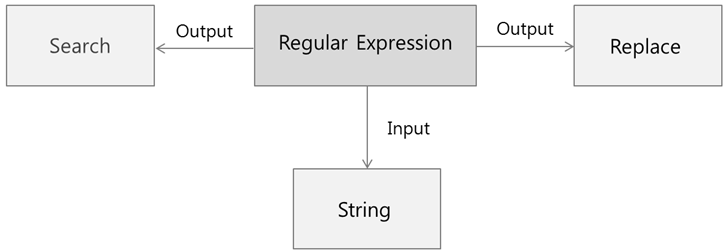

## Meta characters
- .(dot) : 문자 사이 모든 문자
- *(asterisk) : 해당 문자 0번 이상 반복
- +(plus) : 해당 문자 1번 이상 반복
- {}(curly braces) : {n} -> n번 반복, {n, m} -> n~m번
- ?(question) : 있거나 없거나

## Character classes
- \[](braket) : 안의 영문자 포함 여부
 * -(하이픈) : [a-z] -> a부터 z까지
 * ^(not...?) : 해당 제외

## Anchors
- ^(starting position)
- $(ending position)

## Match method
- greedy : 마지막까지 검색
- lazy : 처음에 나오면 끝

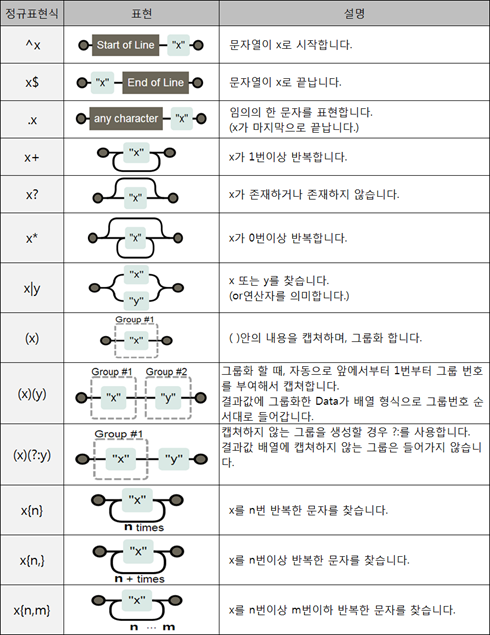

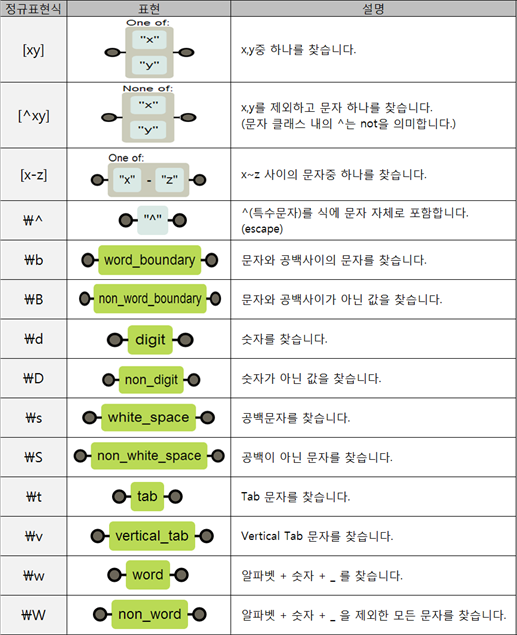

# 180719

---

## search VS match
- 아무데서나 매칭되는 것을 찾음(매칭된 처음 것)
- 처음 나오는 string에서 찾음
- 아무튼 둘 다 잘 안쓴다

In [1]:
import re

In [7]:
content = "Hello world"

dot = re.compile("(H..).(o..)")

In [8]:
type(dot)
plus = re.compile("l+")

In [10]:
re.search(plus, content)

<_sre.SRE_Match object; span=(2, 4), match='ll'>

In [16]:
print(re.search('w', content))
print(re.match('w', content))
print(re.findall('w', content))

<_sre.SRE_Match object; span=(6, 7), match='w'>
None
['w']


In [17]:
print(re.search(plus, content))
print(re.match(plus, content))
print(re.findall(plus, content))

<_sre.SRE_Match object; span=(2, 4), match='ll'>
None
['ll', 'l']


## sub
- 아무튼 치환함
- re.compile(r'').sub('', {data})

In [19]:
data = """
park 800905-1042938
kim  700904-1029384
"""

pattern = re.compile("(\d{6})[-]\d{7}")
print(pattern.sub("\g<1>-*******", data))


park 800905-*******
kim  700904-*******



In [20]:
p = re.compile('Crow|Servo')
m = p.match('CrowHello')
print(m)

<_sre.SRE_Match object; span=(0, 4), match='Crow'>


In [22]:
print(re.search('^Life', 'Life is too short'))
print(re.search('^Life', 'My Life'))

<_sre.SRE_Match object; span=(0, 4), match='Life'>
None


In [24]:
print(re.search('short$', 'Life is too short'))
print(re.search('short$', 'Life is too short, you need python'))

<_sre.SRE_Match object; span=(12, 17), match='short'>
None


In [25]:
p = re.compile('(ABC)+')
m = p.search('ABCABCABC OK?')
print(m.group())

ABCABCABC


In [26]:
p = re.compile(r'\bclass\b')
print(p.search('no class at all'))
print(p.search('one subclass is'))
print(p.search('the declassified algorithm'))

<_sre.SRE_Match object; span=(3, 8), match='class'>
None
None


In [27]:
p = re.compile(r'\Bclass\B')
print(p.search('no class at all'))
print(p.search('one subclass is'))
print(p.search('the declassified algorithm'))

None
None
<_sre.SRE_Match object; span=(6, 11), match='class'>


In [33]:
p = re.compile(r'\w+\s+\d+[-]\d+[-]\d+')
m = p.search('park 010-1234-1234')
print(m)

p = re.compile(r'(\w+)\s+\d+[-]\d+[-]\d+')
m = p.search('park 010-1234-1234') # ()괄호로 이름도 한 번 찾아 추출 후 grouping
print(m.group(1))



<_sre.SRE_Match object; span=(0, 18), match='park 010-1234-1234'>
park


## group
- group : 매치된 문자열 리턴
- start : 문자열 시작 위치 리턴
- end : 문자열의 끝 위치 리턴
- span : 매치된 문자열의 (시작, 끝) 튜플 리턴

In [36]:
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")
print(m.group(0))
print(m.group(1))
print(m.group(2))
print(m.group(1, 2))

Isaac Newton
Isaac
Newton
('Isaac', 'Newton')


In [38]:
p = re.compile(r"(\w+) (\w+)")
m = p.search("Isaac Newton, physicist")
print(m.group())
p.sub("\g<2> \g<1>", "Issac Newton, physicist")

Isaac Newton


'Newton Issac, physicist'

## 문제

In [41]:
import re
p = re.compile(r'a[.]{3,}b')
m1 = p.search('acccb')
m2 = p.search('a....b')
m3 = p.search('aaab')
m4 = p.search('a.cccb')
print(m1)
print(m2)
print(m3)
print(m4)

None
<_sre.SRE_Match object; span=(0, 6), match='a....b'>
None
None


In [49]:
import re
p = re.compile(r'(\w+\s+\d+[-]\d+[-])\d+')
data = """
park 010-8274-2738
kim 010-1824-1839
lee 010-8778-5759
"""
print(p.sub("\g<1>-****", data))




park 010-8274--****
kim 010-1824--****
lee 010-8778--****



In [86]:
import re
p = re.compile(r'.*[@].*[.]com|.*[@].*[.]net')
data = """
park@naver.com
kim@daum.net
lee@myhome.co.kr
"""
m = p.findall(data)
print(m)

['park@naver.com', 'kim@daum.net']


In [76]:
p = re.compile(r"\W")
data = "정규식 너무 싫다"
re.split(p, data)

['정규식', '너무', '싫다']